# LLMs and Embeddings

This notebook covers Large Language Models (LLMs) and embeddings:
- **What are LLMs?**: Understanding transformer-based language models
- **Embeddings**: Dense vector representations of text
- **Embedding Models**: OpenAI, Hugging Face, and other embedding models
- **Applications**: Semantic search, similarity, clustering, and more
- **Practical Examples**: Working with embeddings in real-world scenarios

## Learning Objectives

- Understand what LLMs are and how they work
- Learn about embeddings and their properties
- Use different embedding models (OpenAI, Hugging Face)
- Calculate semantic similarity between texts
- Apply embeddings for search and clustering tasks


## Installation

Run this cell to install required packages (uncomment if needed):


In [ ]:
# Install packages (uncomment if needed)
# !pip install openai sentence-transformers numpy pandas matplotlib seaborn scikit-learn


## 1. What are LLMs?

**Large Language Models (LLMs)** are AI systems trained on vast amounts of text data to understand and generate human-like text. Key characteristics:

- **Transformer Architecture**: Based on the transformer architecture (attention mechanism)
- **Pre-training**: Trained on large text corpora to learn language patterns
- **Context Understanding**: Can understand context and relationships between words
- **Generative**: Can generate coherent text based on prompts
- **Embeddings**: Create dense vector representations of text

Popular LLMs include GPT-4, Claude, Llama, and others.


## 2. Understanding Embeddings

**Embeddings** are dense vector representations of text that capture semantic meaning. Unlike sparse representations (like TF-IDF), embeddings:

- **Dense Vectors**: Typically 384, 512, 768, or 1536 dimensions
- **Semantic Meaning**: Similar texts have similar vectors
- **Context-Aware**: Understand word context and relationships
- **Fixed Size**: Same dimension regardless of input text length

### Key Properties:
- **Semantic Similarity**: Similar meanings → Similar vectors
- **Distance Metrics**: Cosine similarity, Euclidean distance
- **Dimensionality**: Higher dimensions can capture more nuance


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 3. Using Sentence Transformers (Hugging Face)

Sentence Transformers is a popular library for generating embeddings. It's free and works offline!


In [2]:
# Using Sentence Transformers (Hugging Face)
# This is free and works offline - no API key needed!

try:
    from sentence_transformers import SentenceTransformer
    
    # Load a pre-trained model
    # 'all-MiniLM-L6-v2' is a lightweight, fast model (384 dimensions)
    # Other options: 'all-mpnet-base-v2' (768 dims, better quality), 'all-MiniLM-L12-v2'
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    print("Model loaded successfully!")
    print(f"Model: {model.get_sentence_embedding_dimension()} dimensions")
except ImportError:
    print("sentence-transformers not installed. Install with: pip install sentence-transformers")
    model = None


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded successfully!
Model: 384 dimensions


### Generate Embeddings


In [3]:
# Sample texts
texts = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing helps computers understand human language",
    "Computer vision enables machines to interpret visual information",
    "I love eating pizza on weekends"
]

if model:
    # Generate embeddings
    embeddings = model.encode(texts, show_progress_bar=True)
    
    print(f"Generated embeddings for {len(texts)} texts")
    print(f"Embedding shape: {embeddings.shape}")
    print(f"Each text is represented as a {embeddings.shape[1]}-dimensional vector")
    
    # Show first embedding (first few dimensions)
    print(f"\nFirst embedding (first 10 dimensions): {embeddings[0][:10]}")
else:
    embeddings = None
    print("Model not available. Please install sentence-transformers.")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Generated embeddings for 5 texts
Embedding shape: (5, 384)
Each text is represented as a 384-dimensional vector

First embedding (first 10 dimensions): [-0.04610743 -0.00426063  0.06983657  0.03553527  0.04850206 -0.0302253
  0.00160391 -0.00954235 -0.05142448 -0.00386021]


### Calculate Semantic Similarity


Semantic Similarity Matrix (Cosine Similarity):
        Text 1  Text 2  Text 3  Text 4  Text 5
Text 1   1.000   0.403   0.372   0.415   0.044
Text 2   0.403   1.000   0.241   0.326   0.007
Text 3   0.372   0.241   1.000   0.476  -0.023
Text 4   0.415   0.326   0.476   1.000   0.047
Text 5   0.044   0.007  -0.023   0.047   1.000


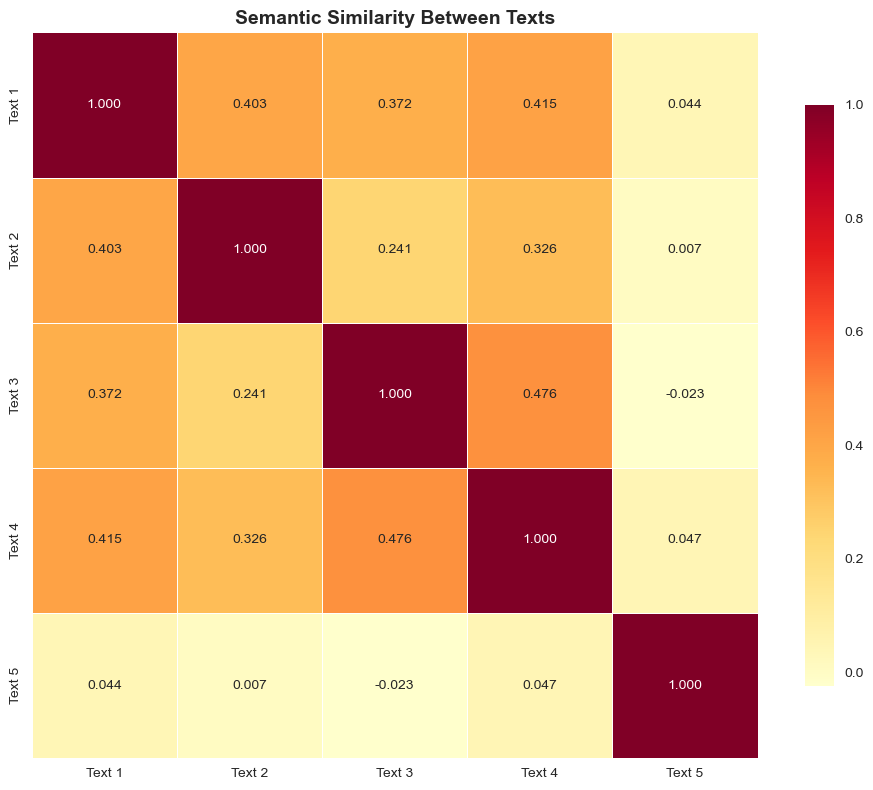


Most Similar Text Pairs:
Text 1 ↔ Text 2: 0.403
  'Machine learning is a subset of artificial intelli...'
  'Deep learning uses neural networks with multiple l...'

Text 1 ↔ Text 3: 0.372
  'Machine learning is a subset of artificial intelli...'
  'Natural language processing helps computers unders...'

Text 1 ↔ Text 4: 0.415
  'Machine learning is a subset of artificial intelli...'
  'Computer vision enables machines to interpret visu...'

Text 1 ↔ Text 5: 0.044
  'Machine learning is a subset of artificial intelli...'
  'I love eating pizza on weekends...'

Text 2 ↔ Text 3: 0.241
  'Deep learning uses neural networks with multiple l...'
  'Natural language processing helps computers unders...'

Text 2 ↔ Text 4: 0.326
  'Deep learning uses neural networks with multiple l...'
  'Computer vision enables machines to interpret visu...'

Text 2 ↔ Text 5: 0.007
  'Deep learning uses neural networks with multiple l...'
  'I love eating pizza on weekends...'

Text 3 ↔ Text 4: 0.476
  'Natura

In [4]:
if embeddings is not None:
    # Calculate cosine similarity between all pairs
    similarity_matrix = cosine_similarity(embeddings)
    
    # Create a DataFrame for better visualization
    similarity_df = pd.DataFrame(
        similarity_matrix,
        index=[f"Text {i+1}" for i in range(len(texts))],
        columns=[f"Text {i+1}" for i in range(len(texts))]
    )
    
    print("Semantic Similarity Matrix (Cosine Similarity):")
    print(similarity_df.round(3))
    
    # Visualize similarity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_df, annot=True, fmt='.3f', cmap='YlOrRd', 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Semantic Similarity Between Texts', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find most similar pairs
    print("\nMost Similar Text Pairs:")
    for i in range(len(texts)):
        for j in range(i+1, len(texts)):
            similarity = similarity_matrix[i][j]
            print(f"Text {i+1} ↔ Text {j+1}: {similarity:.3f}")
            print(f"  '{texts[i][:50]}...'")
            print(f"  '{texts[j][:50]}...'")
            print()


### Semantic Search Example


In [5]:
if model:
    # Query text
    query = "How do neural networks work?"
    
    # Generate embedding for query
    query_embedding = model.encode([query])
    
    # Calculate similarity with all texts
    similarities = cosine_similarity(query_embedding, embeddings)[0]
    
    # Get top matches
    top_indices = np.argsort(similarities)[::-1]
    
    print(f"Query: '{query}'\n")
    print("Top 3 Most Relevant Texts:")
    print("-" * 60)
    
    for rank, idx in enumerate(top_indices[:3], 1):
        print(f"\nRank {rank} (Similarity: {similarities[idx]:.3f}):")
        print(f"  {texts[idx]}")


Query: 'How do neural networks work?'

Top 3 Most Relevant Texts:
------------------------------------------------------------

Rank 1 (Similarity: 0.579):
  Deep learning uses neural networks with multiple layers

Rank 2 (Similarity: 0.385):
  Computer vision enables machines to interpret visual information

Rank 3 (Similarity: 0.364):
  Machine learning is a subset of artificial intelligence


## 4. Using OpenAI Embeddings

OpenAI provides high-quality embeddings via their API. Requires an API key.


In [6]:
# Using OpenAI Embeddings
# Requires: pip install openai
# Set your API key: export OPENAI_API_KEY='your-key-here' or use openai.api_key

try:
    from openai import OpenAI
    
    # Initialize client (will use OPENAI_API_KEY environment variable)
    # client = OpenAI(api_key="your-api-key-here")  # Or set it explicitly
    
    # Check if API key is set
    api_key = os.getenv('OPENAI_API_KEY')
    if api_key:
        client = OpenAI()
        print("OpenAI client initialized (using environment variable)")
    else:
        client = None
        print("OPENAI_API_KEY not found. Set it to use OpenAI embeddings.")
        print("You can still use Sentence Transformers above (free, offline)!")
        
except ImportError:
    client = None
    print("openai package not installed. Install with: pip install openai")


OPENAI_API_KEY not found. Set it to use OpenAI embeddings.
You can still use Sentence Transformers above (free, offline)!


In [ ]:
if client:
    # Generate embeddings using OpenAI
    # text-embedding-3-small: 1536 dimensions, fast and cost-effective
    # text-embedding-3-large: 3072 dimensions, higher quality
    # text-embedding-ada-002: 1536 dimensions (older model)
    
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=texts
    )
    
    # Extract embeddings
    openai_embeddings = np.array([item.embedding for item in response.data])
    
    print(f"Generated OpenAI embeddings for {len(texts)} texts")
    print(f"Embedding shape: {openai_embeddings.shape}")
    print(f"Model used: {response.model}")
    
    # Calculate similarity
    openai_similarity = cosine_similarity(openai_embeddings)
    
    print("\nOpenAI Embeddings Similarity Matrix:")
    openai_sim_df = pd.DataFrame(
        openai_similarity,
        index=[f"Text {i+1}" for i in range(len(texts))],
        columns=[f"Text {i+1}" for i in range(len(texts))]
    )
    print(openai_sim_df.round(3))
else:
    print("OpenAI client not available. Skipping OpenAI embeddings example.")


## 5. Comparing Different Embedding Models

Let's compare different models to see how they capture semantic relationships.


In [7]:
if model:
    # Test with different sentence pairs
    test_pairs = [
        ("Machine learning is powerful", "AI and ML are transforming tech"),
        ("I love pizza", "Pizza is my favorite food"),
        ("Machine learning is powerful", "I love pizza"),  # Should be dissimilar
    ]
    
    print("Comparing Semantic Similarity:\n")
    print("-" * 70)
    
    for text1, text2 in test_pairs:
        # Generate embeddings
        emb1 = model.encode([text1])
        emb2 = model.encode([text2])
        
        # Calculate similarity
        similarity = cosine_similarity(emb1, emb2)[0][0]
        
        print(f"\nText 1: '{text1}'")
        print(f"Text 2: '{text2}'")
        print(f"Similarity: {similarity:.3f}")
        print("-" * 70)


Comparing Semantic Similarity:

----------------------------------------------------------------------

Text 1: 'Machine learning is powerful'
Text 2: 'AI and ML are transforming tech'
Similarity: 0.500
----------------------------------------------------------------------

Text 1: 'I love pizza'
Text 2: 'Pizza is my favorite food'
Similarity: 0.885
----------------------------------------------------------------------

Text 1: 'Machine learning is powerful'
Text 2: 'I love pizza'
Similarity: 0.100
----------------------------------------------------------------------


## 6. Clustering with Embeddings

Embeddings can be used to cluster similar texts together.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Clustered 10 texts into 3 clusters:


Cluster 0:
  - Natural language processing analyzes text
  - Python is a programming language
  - JavaScript is used for web development

Cluster 1:
  - I enjoy playing basketball on weekends
  - Soccer is a popular sport worldwide
  - Cooking Italian food is my hobby
  - Pizza and pasta are delicious

Cluster 2:
  - Machine learning algorithms learn from data
  - Deep learning uses neural networks
  - Computer vision processes images


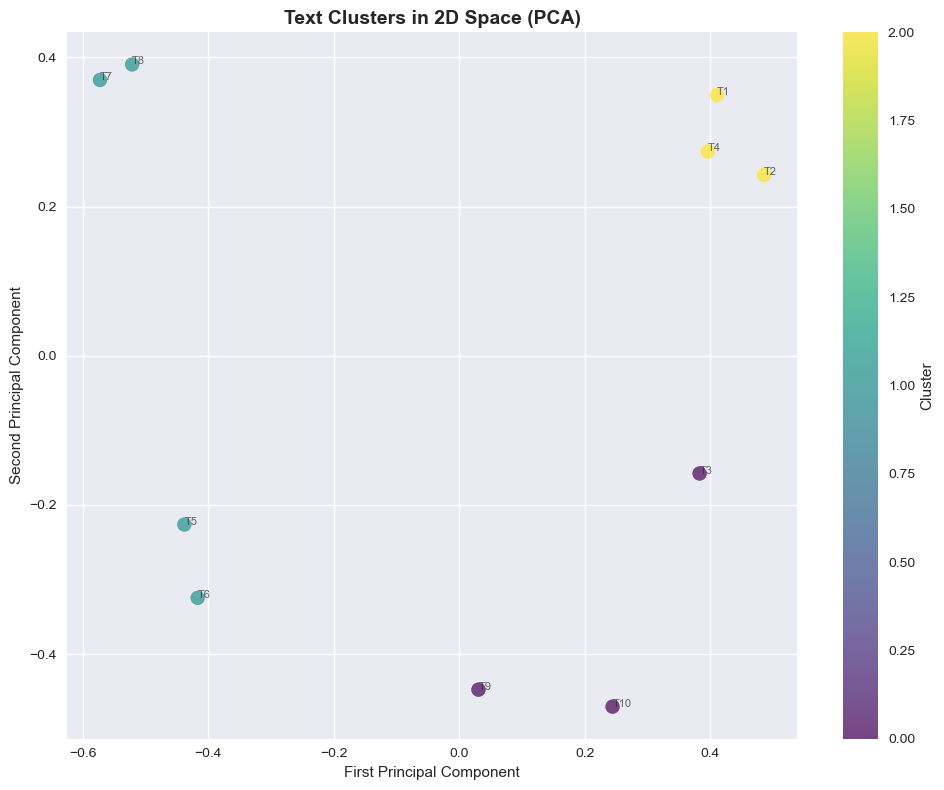

In [8]:
if model:
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    
    # More diverse texts for clustering
    diverse_texts = [
        "Machine learning algorithms learn from data",
        "Deep learning uses neural networks",
        "Natural language processing analyzes text",
        "Computer vision processes images",
        "I enjoy playing basketball on weekends",
        "Soccer is a popular sport worldwide",
        "Cooking Italian food is my hobby",
        "Pizza and pasta are delicious",
        "Python is a programming language",
        "JavaScript is used for web development"
    ]
    
    # Generate embeddings
    diverse_embeddings = model.encode(diverse_texts)
    
    # Perform K-means clustering
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(diverse_embeddings)
    
    # Create DataFrame
    cluster_df = pd.DataFrame({
        'Text': diverse_texts,
        'Cluster': clusters
    })
    
    print(f"Clustered {len(diverse_texts)} texts into {n_clusters} clusters:\n")
    for cluster_id in range(n_clusters):
        print(f"\nCluster {cluster_id}:")
        cluster_texts = cluster_df[cluster_df['Cluster'] == cluster_id]['Text'].tolist()
        for text in cluster_texts:
            print(f"  - {text}")
    
    # Visualize clusters using PCA (reduce to 2D for visualization)
    pca = PCA(n_components=2, random_state=42)
    embeddings_2d = pca.fit_transform(diverse_embeddings)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                         c=clusters, cmap='viridis', s=100, alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title('Text Clusters in 2D Space (PCA)', fontsize=14, fontweight='bold')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    # Add text labels
    for i, text in enumerate(diverse_texts):
        plt.annotate(f"T{i+1}", (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                    fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    plt.show()


In [ ]:
if model:
    # Compare different Sentence Transformer models
    models_to_compare = {
        'all-MiniLM-L6-v2': 'all-MiniLM-L6-v2',  # 384 dims, fast
        'all-MiniLM-L12-v2': 'all-MiniLM-L12-v2',  # 384 dims, better quality
        # 'all-mpnet-base-v2': 'all-mpnet-base-v2',  # 768 dims, best quality (slower)
    }
    
    test_text = "Machine learning is transforming technology"
    
    print("Model Comparison:\n")
    print("-" * 70)
    
    for model_name, model_path in models_to_compare.items():
        try:
            comp_model = SentenceTransformer(model_path)
            embedding = comp_model.encode([test_text])[0]
            
            print(f"\nModel: {model_name}")
            print(f"  Dimensions: {len(embedding)}")
            print(f"  Model size: ~{comp_model.get_sentence_embedding_dimension()} dims")
        except Exception as e:
            print(f"\nModel: {model_name} - Error loading: {e}")
    
    print("\n" + "-" * 70)
    print("\nNote: Higher dimensions can capture more nuance but are slower to compute.")


## 8. Practical Applications

Embeddings are used in many real-world applications:

1. **Semantic Search**: Find documents similar to a query
2. **Recommendation Systems**: Recommend similar items
3. **Text Classification**: Use embeddings as features
4. **Clustering**: Group similar texts
5. **Anomaly Detection**: Find texts that don't fit patterns
6. **RAG (Retrieval Augmented Generation)**: Retrieve relevant context for LLMs


### Example: Building a Simple Search System


In [9]:
if model:
    class SimpleSemanticSearch:
        def __init__(self, model, documents):
            self.model = model
            self.documents = documents
            self.embeddings = model.encode(documents)
        
        def search(self, query, top_k=3):
            """Search for most similar documents to query"""
            query_embedding = self.model.encode([query])
            similarities = cosine_similarity(query_embedding, self.embeddings)[0]
            top_indices = np.argsort(similarities)[::-1][:top_k]
            
            results = []
            for idx in top_indices:
                results.append({
                    'document': self.documents[idx],
                    'similarity': similarities[idx],
                    'rank': len(results) + 1
                })
            return results
    
    # Create search system
    documents = [
        "Python is a versatile programming language used for data science",
        "Machine learning models can predict future trends",
        "Deep learning uses neural networks with many layers",
        "Natural language processing helps computers understand text",
        "Computer vision enables image recognition and analysis"
    ]
    
    search_system = SimpleSemanticSearch(model, documents)
    
    # Test queries
    queries = [
        "How do neural networks work?",
        "What is data science?",
        "Image processing techniques"
    ]
    
    print("Semantic Search Results:\n")
    print("=" * 70)
    
    for query in queries:
        print(f"\nQuery: '{query}'")
        print("-" * 70)
        results = search_system.search(query, top_k=2)
        for result in results:
            print(f"\nRank {result['rank']} (Similarity: {result['similarity']:.3f}):")
            print(f"  {result['document']}")
        print("=" * 70)


Semantic Search Results:


Query: 'How do neural networks work?'
----------------------------------------------------------------------

Rank 1 (Similarity: 0.575):
  Deep learning uses neural networks with many layers

Rank 2 (Similarity: 0.330):
  Computer vision enables image recognition and analysis

Query: 'What is data science?'
----------------------------------------------------------------------

Rank 1 (Similarity: 0.562):
  Python is a versatile programming language used for data science

Rank 2 (Similarity: 0.274):
  Natural language processing helps computers understand text

Query: 'Image processing techniques'
----------------------------------------------------------------------

Rank 1 (Similarity: 0.516):
  Computer vision enables image recognition and analysis

Rank 2 (Similarity: 0.279):
  Natural language processing helps computers understand text


## 9. Key Takeaways

1. **LLMs** are powerful language models that understand context and generate text
2. **Embeddings** are dense vector representations that capture semantic meaning
3. **Sentence Transformers** provide free, offline embedding models
4. **OpenAI Embeddings** offer high-quality embeddings via API (requires key)
5. **Cosine Similarity** is the standard metric for comparing embeddings
6. **Applications** include search, clustering, recommendations, and RAG systems

### Next Steps:
- Explore vector databases (FAISS, ChromaDB) for storing and searching embeddings
- Learn about RAG (Retrieval Augmented Generation) systems
- Experiment with different embedding models and dimensions
